In [1]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.feature import canny
from skimage.transform import hough_circle, hough_circle_peaks
import numpy as np
from skimage.draw import circle_perimeter
from skimage import color
import cv2
import math

In [2]:
tif = io.imread("../imgs/WAC_GL000.tif")

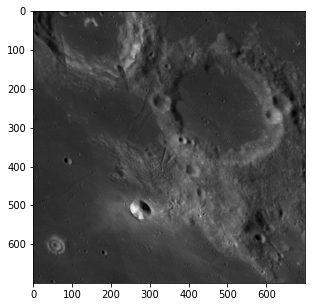

In [3]:
myArea = tif[25500:26500, 10000:11000]
plt.figure(figsize=(5,5))
myArea = cv2.resize(myArea, dsize=(700, 700))
plt.imshow(myArea,  cmap='gray')

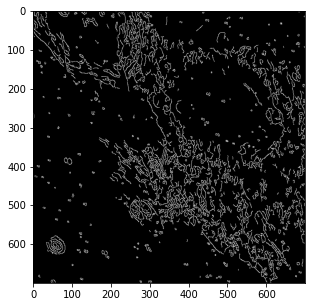

In [4]:
# Load picture and detect edges
edges = canny(myArea)
plt.figure(figsize=(5,5))
plt.imshow(edges, cmap='gray')


In [5]:
# Detect two radii
hough_radii = np.arange(140, 150, 1)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent 3 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=1)

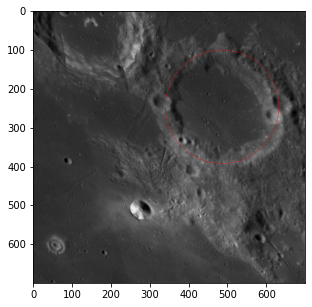

In [6]:
# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5, 5))
image = color.gray2rgb(myArea)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    image[circy, circx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)
plt.show()

486
246
[146]


Text(0.5, 1.0, 'Plot stvorec')

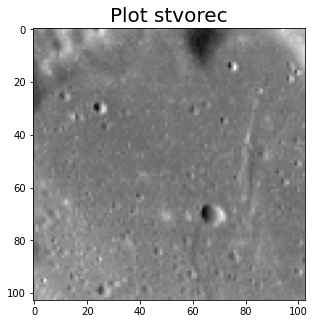

In [7]:
radius = int(radius)
cx = int(cx)
cy = int(cy)

height = int((math.sqrt(0.5*radius**2)))
width = int((math.sqrt(0.5*radius**2)))
stvorec = np.zeros((height, width))
print(cx)
print(cy)
print(radii)
i = int(cy - height)
y = int(cx - width)
stvorec = myArea[i:i+height, y:y+width]

plt.figure(figsize=(5,5))
plt.imshow(stvorec, cmap='gray')
plt.title("Plot stvorec", fontsize=20)

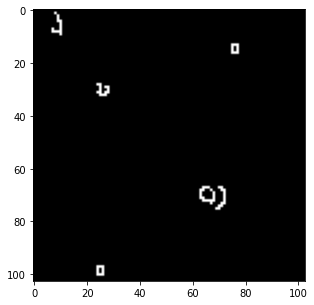

In [8]:
# Load picture and detect edges
edges = canny(stvorec)
plt.figure(figsize=(5,5))
plt.imshow(edges, cmap='gray')

In [9]:
# Detect two radii
hough_radii = np.arange(1, 3)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent 3 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=5)

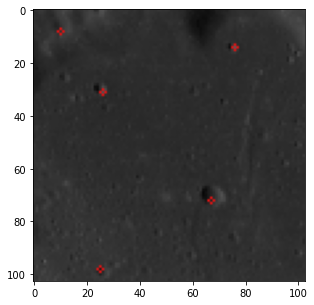

In [10]:
# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5, 5))
image = color.gray2rgb(stvorec)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    image[circy, circx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)
plt.show()
